In [96]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',50)
pd.set_option('display.max_columns',50)
pd.options.display.float_format='{:,.2f}'.format

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
Chile_Products_byCustomer = pd.read_csv('../../data/interim/Chile_Products_byCustomer.csv')
Chile_Products_byCustomer.head()

,customer,platform,date,sold_quantity,division,segment,category,product,variant,total_gross_sales
0,Amazon,E-Commerce,2021-12-01,70,P & A,Peripherals,Processors,AQ Electron 3 3600 Desktop Processor,Standard,"13,862.86"
1,Electricalsbea Stores,Brick & Mortar,2021-11-01,63,P & A,Peripherals,Processors,AQ Electron 3 3600 Desktop Processor,Premium,"13,515.75"
2,Electricalsbea Stores,Brick & Mortar,2021-11-01,70,P & A,Peripherals,Processors,AQ Electron 4 3600 Desktop Processor,Premium,"13,187.36"
3,Amazon,E-Commerce,2021-11-01,65,P & A,Peripherals,Processors,AQ Electron 3 3600 Desktop Processor,Standard,"12,872.65"
4,Amazon,E-Commerce,2021-11-01,58,P & A,Peripherals,Processors,AQ Electron 3 3600 Desktop Processor,Premium,"12,443.07"


In [99]:
Chile_Products_byCustomer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8755 entries, 0 to 8754
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer           8755 non-null   object 
 1   platform           8755 non-null   object 
 2   date               8755 non-null   object 
 3   sold_quantity      8755 non-null   int64  
 4   division           8755 non-null   object 
 5   segment            8755 non-null   object 
 6   category           8755 non-null   object 
 7   product            8755 non-null   object 
 8   variant            8755 non-null   object 
 9   total_gross_sales  8755 non-null   float64
dtypes: float64(1), int64(1), object(8)
memory usage: 684.1+ KB


In [100]:

category_sales_by_customer = Chile_Products_byCustomer.groupby(['category', 'customer']).agg(
    total_gross_sales=('total_gross_sales', 'sum')
).reset_index().sort_values('total_gross_sales', ascending=False)
category_sales_by_customer

,category,customer,total_gross_sales
3,Business Laptop,Electricalsbea Stores,"419,423.73"
2,Business Laptop,Amazon,"416,165.47"
6,Gaming Laptop,Amazon,"380,711.97"
23,Processors,Electricalsbea Stores,"359,313.73"
22,Processors,Amazon,"353,924.26"
20,Personal Laptop,Amazon,"340,836.75"
7,Gaming Laptop,Electricalsbea Stores,"306,512.91"
21,Personal Laptop,Electricalsbea Stores,"302,980.35"
12,Keyboard,Amazon,"260,446.93"
13,Keyboard,Electricalsbea Stores,"226,648.99"


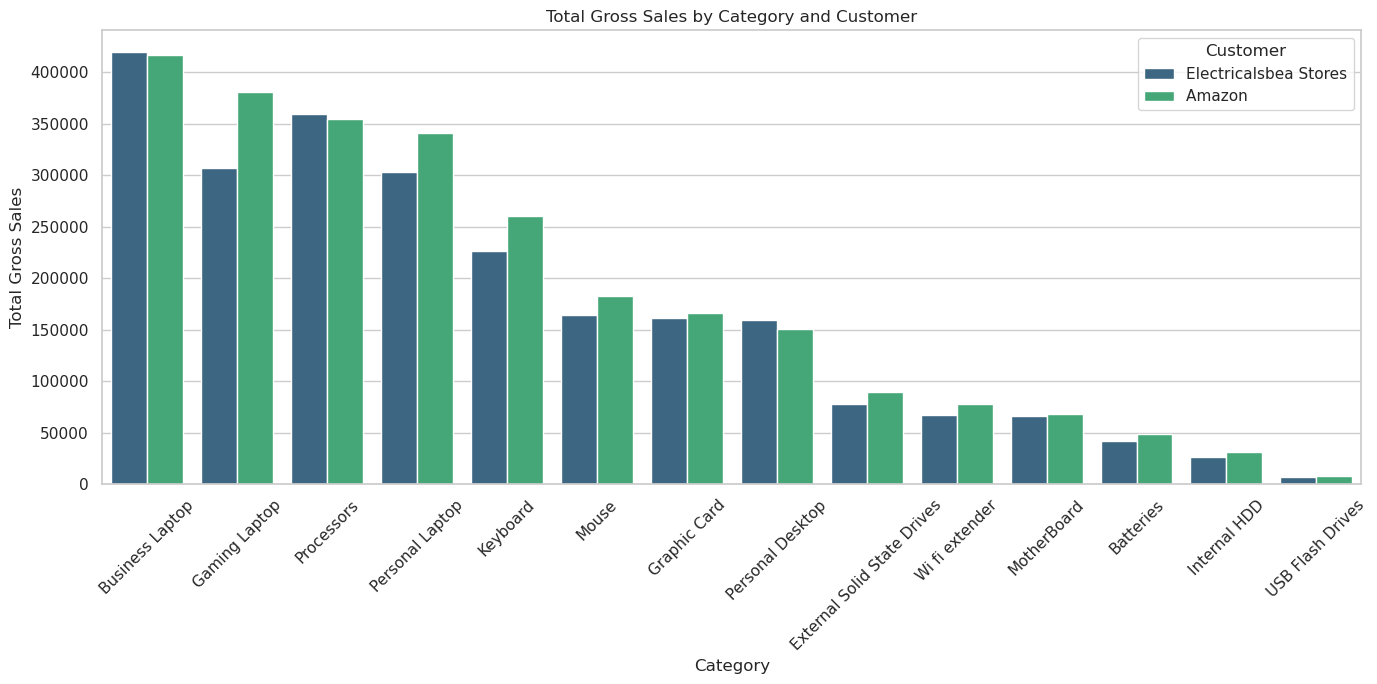

In [101]:


# Plotting the data
plt.figure(figsize=(14, 7))
sns.barplot(data=category_sales_by_customer, x='category', y='total_gross_sales', hue='customer', palette='viridis')
plt.title('Total Gross Sales by Category and Customer')
plt.ylabel('Total Gross Sales')
plt.xlabel('Category')
plt.xticks(rotation=45)
plt.legend(title='Customer')
plt.tight_layout()
plt.show()

Podemos observar que las categorias tienden a tener un numero de ventas parecido por cliente, es decir, por plataforma, y realmente son muy competidas. Amazon tiende a ganar en ventas en algunas, y Electricalsbea Stores en otras, es de hecho la que mas vende en Laptops de negocios. Me pregunto que tienda ganara en mas ventas totales, solo por curiosidad:

In [102]:
category_sales_by_customer.groupby('customer')['total_gross_sales'].sum()

customer
Amazon                  2,574,977.94
Electricalsbea Stores   2,387,611.96
Name: total_gross_sales, dtype: float64

Wow, la cantidad de dinero que maneja esta tienda es asombroso. Piensen que la suma de estos dos, da cerca de 5 millones de dolares!! Y en solo su periodo en chile, que comprende de:

In [103]:
chile = pd.read_csv('../../data/interim/chile.csv')
chile.head()

,customer,platform,channel,market,date,sold_quantity,division,segment,category,product,variant,total_gross_sales
0,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-09-01,1,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,16.23
1,Amazon,E-Commerce,Retailer,Chile,2019-10-01,2,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,32.46
2,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-11-01,4,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,64.93
3,Amazon,E-Commerce,Retailer,Chile,2019-11-01,4,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,64.93
4,Electricalsbea Stores,Brick & Mortar,Retailer,Chile,2019-12-01,3,P & A,Peripherals,Internal HDD,AQ Dracula HDD – 3.5 Inch SATA 6 Gb/s 5400 RPM...,Standard,48.70


In [104]:
chile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8755 entries, 0 to 8754
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer           8755 non-null   object 
 1   platform           8755 non-null   object 
 2   channel            8755 non-null   object 
 3   market             8755 non-null   object 
 4   date               8755 non-null   object 
 5   sold_quantity      8755 non-null   int64  
 6   division           8755 non-null   object 
 7   segment            8755 non-null   object 
 8   category           8755 non-null   object 
 9   product            8755 non-null   object 
 10  variant            8755 non-null   object 
 11  total_gross_sales  8755 non-null   float64
dtypes: float64(1), int64(1), object(10)
memory usage: 820.9+ KB


In [105]:
grouped_data = chile.groupby(['date', 'category', 'customer'])['total_gross_sales'].sum().reset_index()
grouped_data.head()

,date,category,customer,total_gross_sales
0,2019-09-01,External Solid State Drives,Electricalsbea Stores,"1,229.07"
1,2019-09-01,Graphic Card,Electricalsbea Stores,777.60
2,2019-09-01,Internal HDD,Electricalsbea Stores,254.30
3,2019-09-01,Keyboard,Electricalsbea Stores,"2,046.25"
4,2019-09-01,MotherBoard,Electricalsbea Stores,30.74


In [106]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               471 non-null    object 
 1   category           471 non-null    object 
 2   customer           471 non-null    object 
 3   total_gross_sales  471 non-null    float64
dtypes: float64(1), object(3)
memory usage: 14.8+ KB


In [107]:
time_series_data = chile.groupby('date')['total_gross_sales'].sum().reset_index()

In [108]:
time_series_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               28 non-null     object 
 1   total_gross_sales  28 non-null     float64
dtypes: float64(1), object(1)
memory usage: 580.0+ bytes


KeyError: 'Amazon '

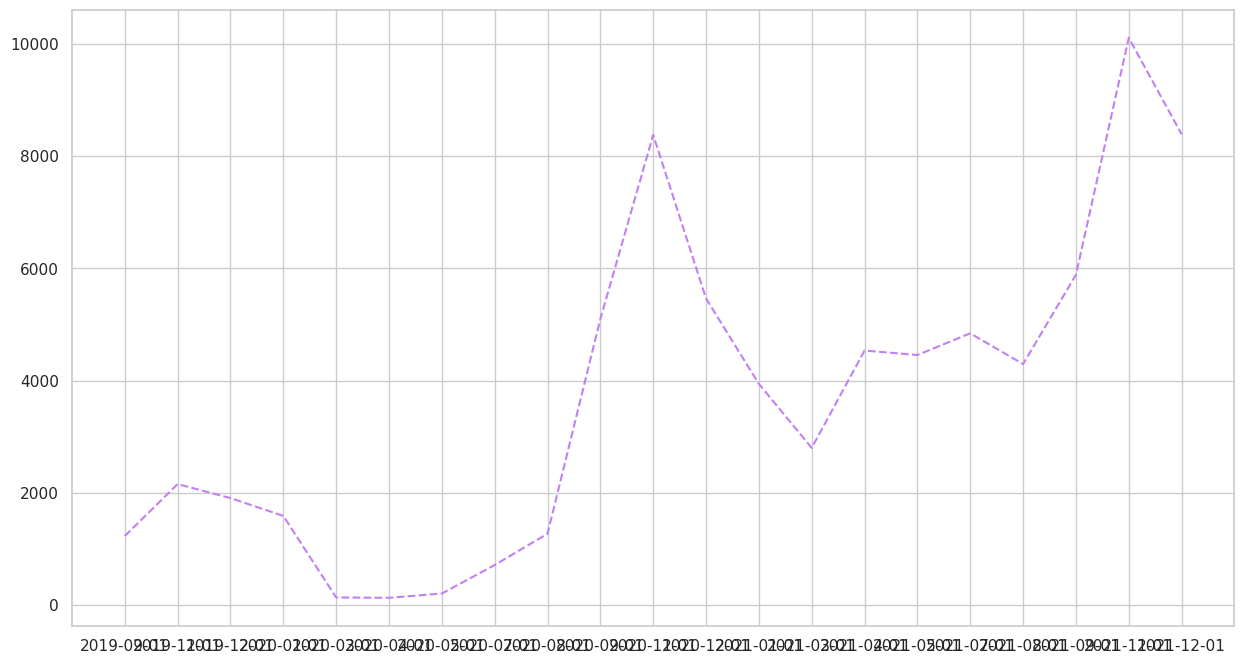

In [109]:
chile['customer'] = chile['customer'].str.strip()

# Definir la variable linestyles
linestyles = {
    'Amazon': '-',
    'Electricalsbea Stores': '--'
}

# Definir una paleta de colores para las categorías
palette = sns.color_palette("husl", n_colors=chile['category'].nunique())

# Crear un mapa de colores para cada categoría
color_map = {category: palette[i] for i, category in enumerate(chile['category'].unique())}

# Agrupar los datos por fecha, categoría y cliente


# Crear la visualización de series temporales
plt.figure(figsize=(15, 8))
for category in grouped_data['category'].unique():
    for customer in grouped_data['customer'].unique():
        subset = grouped_data[(grouped_data['category'] == category) & (grouped_data['customer'] == customer)]
        plt.plot(subset['date'], subset['total_gross_sales'], label=f'{category} ({customer})', linestyle=linestyles[customer], color=color_map[category])

plt.title('Ventas Brutas Totales a lo largo del Tiempo por Categoría y Cliente')
plt.xlabel('Fecha')
plt.ylabel('Ventas Brutas Totales')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.grid(True)
plt.show()


> To GPT4:  
    >Sabes cual es el problema que veo en las graficas que me estas dando??  las fechas a partir del 2021-12-01 regresan a 2019 y pierden la cronologia. Parece ser que el problema este en el orden de los datos que te proporcione. Justamente esos meses son los que faltan dentro de la correcta cronologia. Puedes ordenar los datos en base al eje x de la grafica?? Es decir, las fechas

In [110]:
grouped_data['date'] = pd.to_datetime(grouped_data['date'])
grouped_data = grouped_data.sort_values(by='date')
categories = grouped_data['category'].unique()
grouped_data

,date,category,customer,total_gross_sales
0,2019-09-01,External Solid State Drives,Electricalsbea Stores,"1,229.07"
1,2019-09-01,Graphic Card,Electricalsbea Stores,777.60
2,2019-09-01,Internal HDD,Electricalsbea Stores,254.30
3,2019-09-01,Keyboard,Electricalsbea Stores,"2,046.25"
4,2019-09-01,MotherBoard,Electricalsbea Stores,30.74
...,...,...,...,...
444,2021-12-01,Batteries,Electricalsbea Stores,"16,105.29"
443,2021-12-01,Batteries,Amazon,"14,883.07"
469,2021-12-01,Wi fi extender,Amazon,"7,496.09"
455,2021-12-01,Keyboard,Amazon,"43,687.06"


Wow, isn't this amazing?? Look the next visualization maded by Code Interpreter:

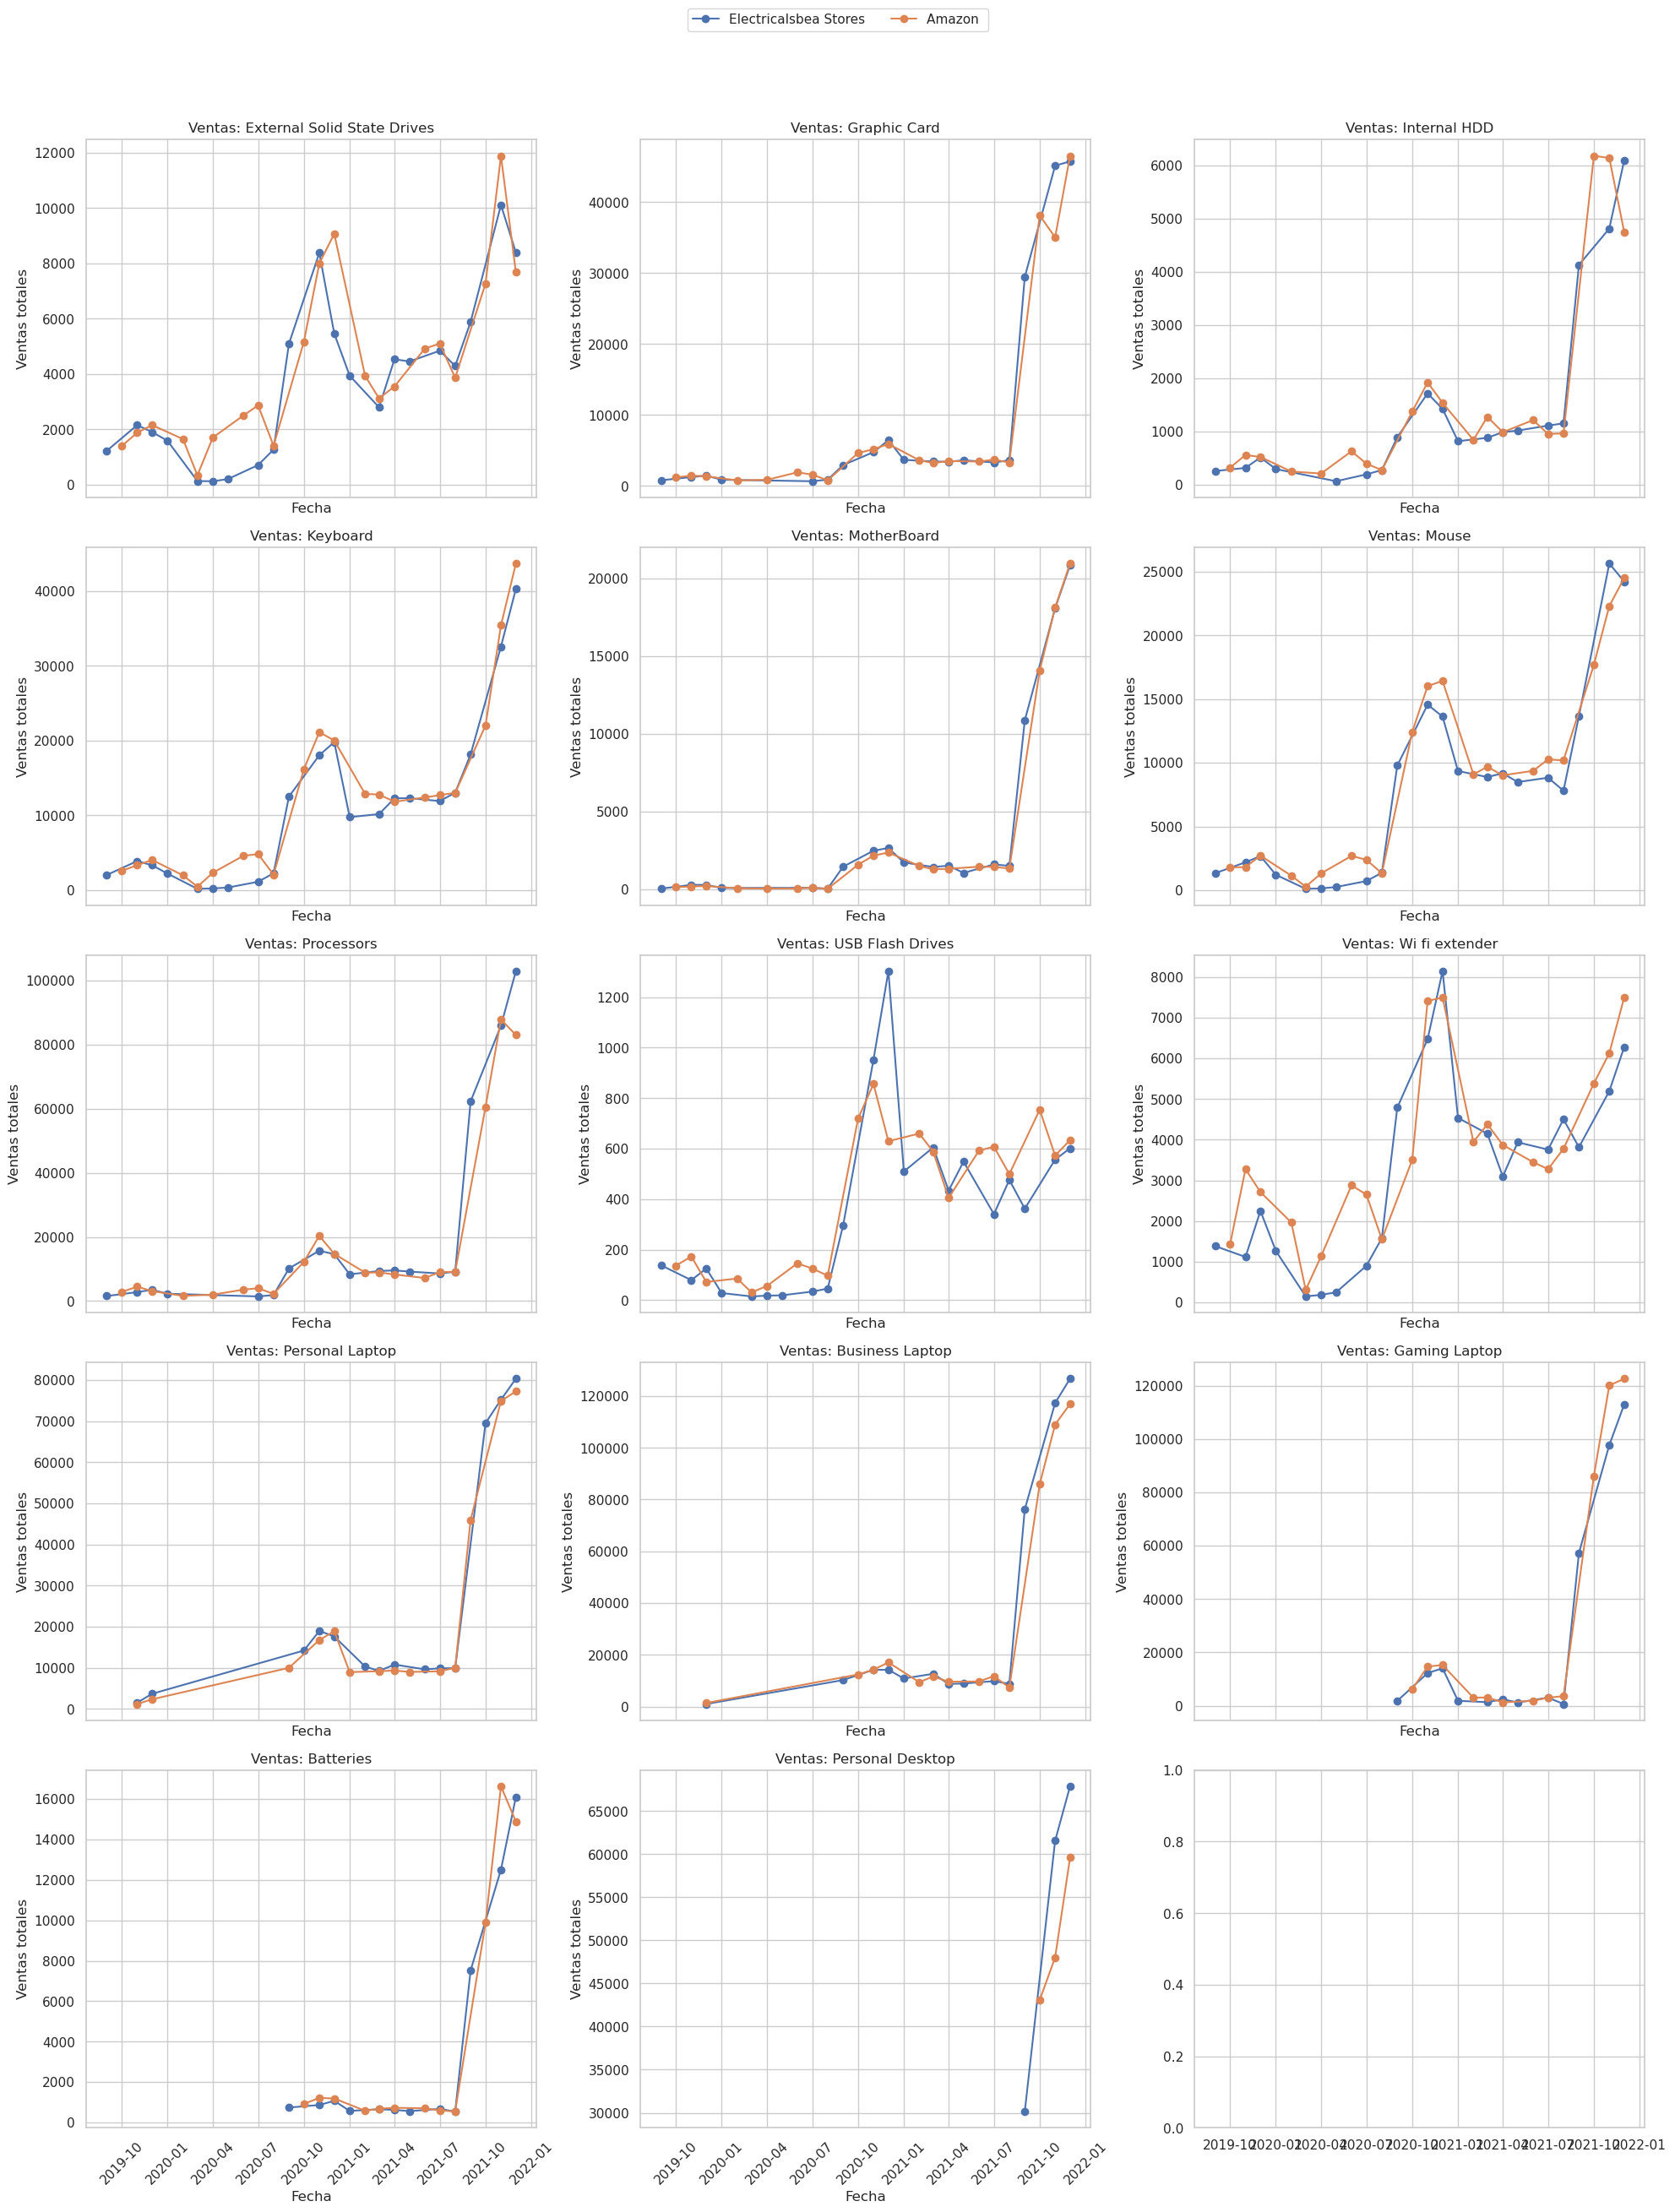

In [111]:
import sys
sys.path.append('..')
from utility import plot_settings

# Ajustamos el número de filas y columnas para la matriz de gráficos
n_cols = 3
n_rows = int(np.ceil(len(categories) / n_cols))

# Creamos la matriz de gráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows), sharex=True)

# Iteramos sobre cada categoría y la colocamos en la matriz
for idx, category in enumerate(categories):
    row = idx // n_cols
    col = idx % n_cols
    ax = axes[row, col]
    subset = grouped_data[grouped_data['category'] == category]
    lines = []  # Almacenamos las líneas para la leyenda
    labels = []  # Almacenamos las etiquetas para la leyenda
    for customer in subset['customer'].unique():
        customer_data = subset[subset['customer'] == customer]
        line, = ax.plot(customer_data['date'], customer_data['total_gross_sales'], label=customer, marker='o')
        lines.append(line)
        labels.append(customer)
    ax.set_title(f'Ventas: {category}')
    ax.set_xlabel('Fecha')
    ax.set_ylabel('Ventas totales')
    ax.grid(True)
    ax.tick_params(axis='x', rotation=45)

# Ajustamos el layout y añadimos una leyenda global
fig.tight_layout()
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=len(labels))
plt.show()


Look the competition about these two customers!! We, can observe that both of them had growth exponentially! Y quiza el hecho de ser distintos en plataforma, es lo que le ha permitido competir a Electricalsbea Stores contra Amazon!! 

Podemos ver que algunos productos como las baterias, y las laptop en general!! son las que mayor pendiente han conseguido en los ultimos meses. Solo mira el "Personal Desktop" Que desde que salio en Septiembre del 2021 aprox, se ha permanecido creciendo tanto en tan poco tiempo

Pero hay algo... hay algo que marco esta tendencia, porque muchas de las categorias comenzaron a crecer de esta forma tan abrupta a partir de 2021-07! Para una mejor visualizacion, pongamoslas todas juntas del mismo grafico:

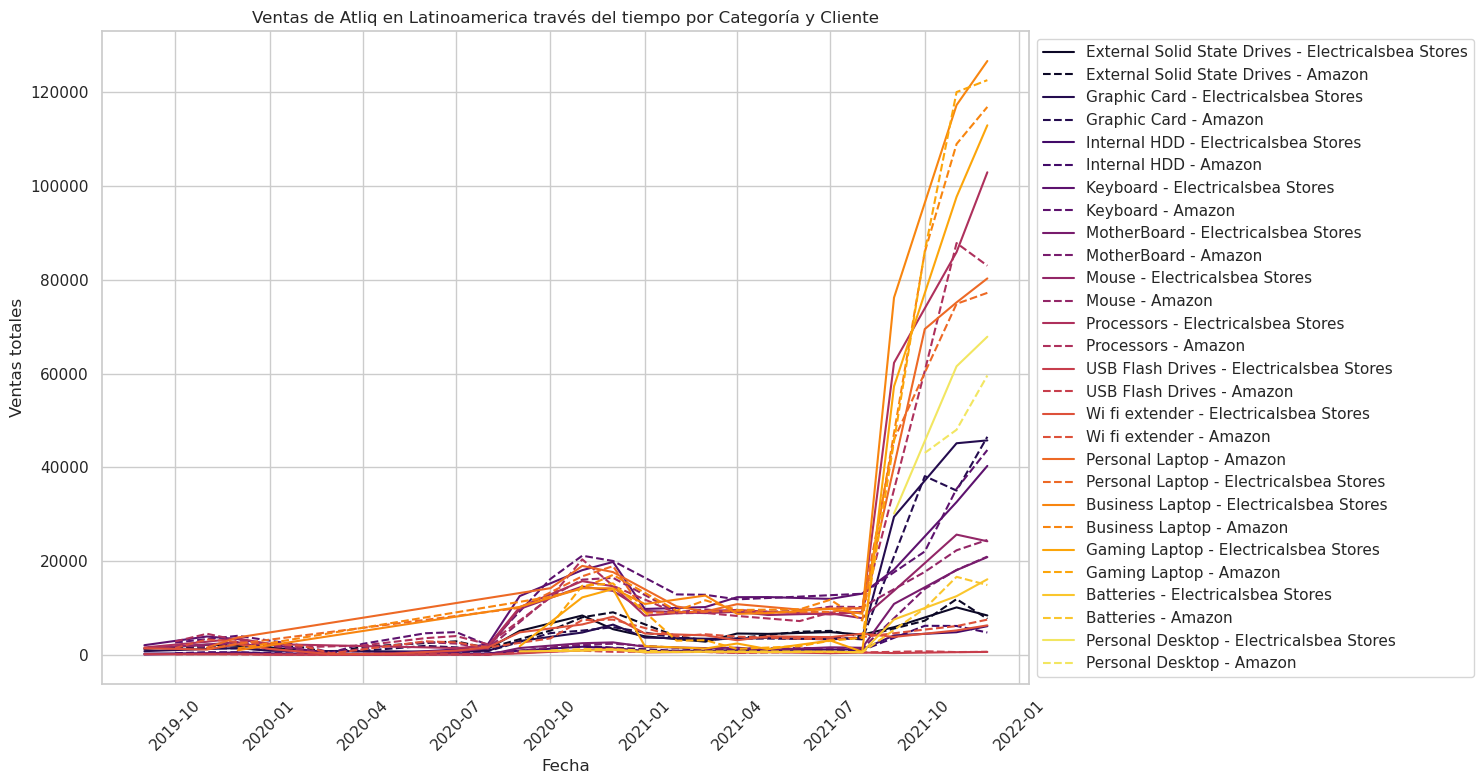

In [112]:
line_styles = ['-', '--', '-.', ':']

# Establecemos el estilo y la paleta de colores de Seaborn
sns.set(style="whitegrid")
palette = sns.color_palette("inferno", n_colors=len(categories))

# Creamos el gráfico
fig, ax = plt.subplots(figsize=(15, 8))

for idx, category in enumerate(categories):
    subset = grouped_data[grouped_data['category'] == category]
    for j, customer in enumerate(subset['customer'].unique()):
        customer_data = subset[subset['customer'] == customer]
        sns.lineplot(data=customer_data, x='date', y='total_gross_sales', 
                    label=f"{category} - {customer}", 
                    color=palette[idx], 
                    linestyle=line_styles[j % len(line_styles)], 
                    ax=ax)

ax.set_title('Ventas de Atliq en Latinoamerica través del tiempo por Categoría y Cliente')
ax.set_xlabel('Fecha')
ax.set_ylabel('Ventas totales')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.grid(True)
ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



Wow! Podemos ver que las laptop en general fueron las del cecimiento mas abrupto! No diria que fue exactamente en julio, si no en agosto y podemos ver que tanto Amazon como Electricalsbea Stores crecieron de forma similar, lo que me hace pensar que este crecimiento no fue gracias ni a los clientes, ni a la plataforma, ni a los productos (que podemos ver que algunos llevaban casi hasta 2 anos en el mercado sin crecer practicamente nada). Este incremento en ventas creo se debio a algun cambio en la direccion de Atliq en Latinoamerica en Agosto del 2021. Para encontrar que fue lo que ocasiono esto, buscare en internet noticias o algo parecido, y hare una notebook especializada en encontrar ese momento que hizo crecer a AtliQ de esta forma!!

In [113]:
grouped_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 471 entries, 0 to 470
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               471 non-null    datetime64[ns]
 1   category           471 non-null    object        
 2   customer           471 non-null    object        
 3   total_gross_sales  471 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 18.4+ KB


In [114]:
# Export

Eso fue todo! Gracias por llegar hasta aca! Si quieres ver cual fue ese momento exacto, cerca de Agosto del 2021 que exponencializo las ventas de Atliq de forma tan abrupta, deje mi proyecto en un repositorio en Github, si es que quieres experimentar con todo esto en tu maquina local n.n

Estoy pensando que ChatGPT-4 tiene conocimiento entrenado hasta semptiembre del 2021, y este punto pivotal ocurrio en Agosto, asi que quiza haya recopilado algo de informacion sobre esto...